In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import utils
from sklearn.datasets import make_moons, make_blobs
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from matplotlib.cm import get_cmap

In [2]:
def my_make_blobs():
    X, y = make_blobs(n_samples=400, centers=4, cluster_std=.6, random_state=0)
    rng = np.random.RandomState(13)
    X_stretched = np.dot(X, rng.randn(2, 2))
    return X_stretched, y

In [3]:
class Solution:
    def __init__(self, mixture_model, mixture_params, dataset_generator):
        self.mixture_model = mixture_model
        self.mixture_params = mixture_params
        self.dataset_generator = dataset_generator

    def perform(self, shuffle=False, delete_ratio=0):
        X, y_true = self.dataset_generator()
        if shuffle:
            X, y_true = utils.shuffle(X, y_true)
        assert 0 <= delete_ratio < 1, "delete ratio must be in [0, 1] range"
        if delete_ratio != 0:
            X = X[:int((1 - delete_ratio) * X.shape[0])]
            y_true = y_true[:int((1 - delete_ratio) * y_true.shape[0])]
        mixture = self.mixture_model(**self.mixture_params)
        mixture.fit(X)
        y_pred = mixture.predict(X)
        self._visualize_clusters(X, y_pred, y_true, mixture.__class__.__name__)
        self._show_metrics(y_pred, y_true)

    @staticmethod
    def _show_metrics(y_pred, y_true):
        print(f"homogeneity_score={homogeneity_score(y_true, y_pred)}")
        print(f"completeness_score={completeness_score(y_true, y_pred)}")
        print(f"v_measure_score={v_measure_score(y_true, y_pred)}")
    
    @staticmethod
    def _visualize_clusters(X, y_pred, y_true, model_name):
        def _plot_clusters(X, y, plot_number, title="Origin"):
            ax = fig.add_subplot(1, 2, plot_number)
            for k in range(len(np.unique(y))):
                my_members = y == k
                ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=colors[k], marker=".", markersize=15)

            ax.set_title(title)
            ax.set_xticks(())
            ax.set_yticks(())


        fig = plt.figure(figsize=(12, 8))
        colors = get_cmap("tab20", 20).colors
        np.random.shuffle(colors)
        _plot_clusters(X, y_true, 1)
        _plot_clusters(X, y_pred, 2, model_name)
        fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)

        plt.show()

# GaussianMixture

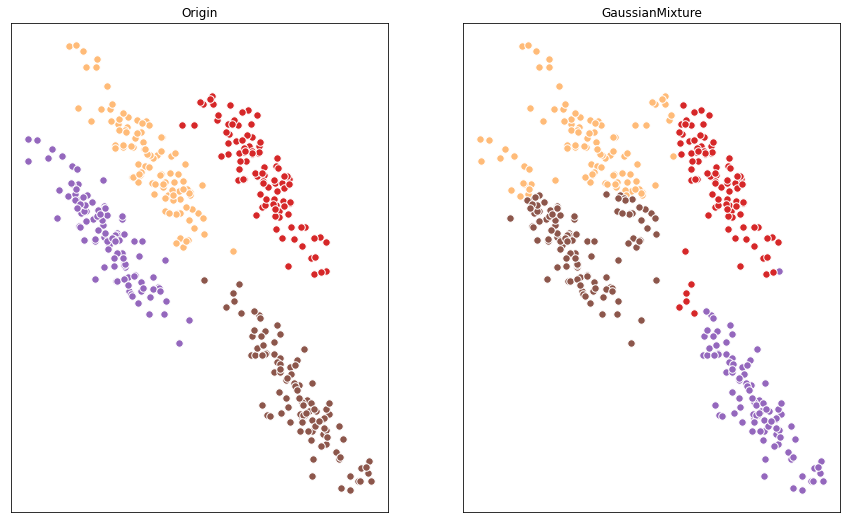

homogeneity_score=0.698439784579788
completeness_score=0.6991785758062676
v_measure_score=0.698808984927821


In [4]:
Solution(GaussianMixture, {"n_components": 4, "covariance_type": "diag"}, my_make_blobs).perform()

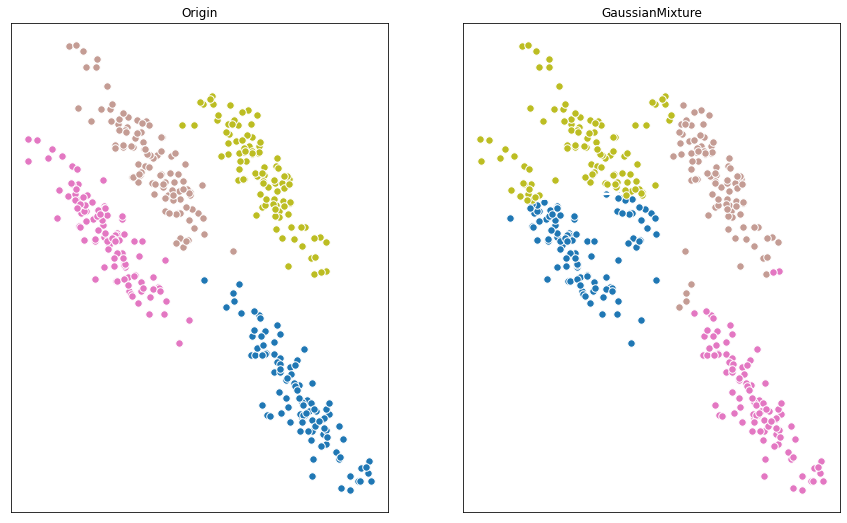

homogeneity_score=0.689898376085906
completeness_score=0.6904351306107642
v_measure_score=0.6901666489875344


In [5]:
Solution(GaussianMixture, {"n_components": 4, "covariance_type": "diag"}, my_make_blobs).perform()

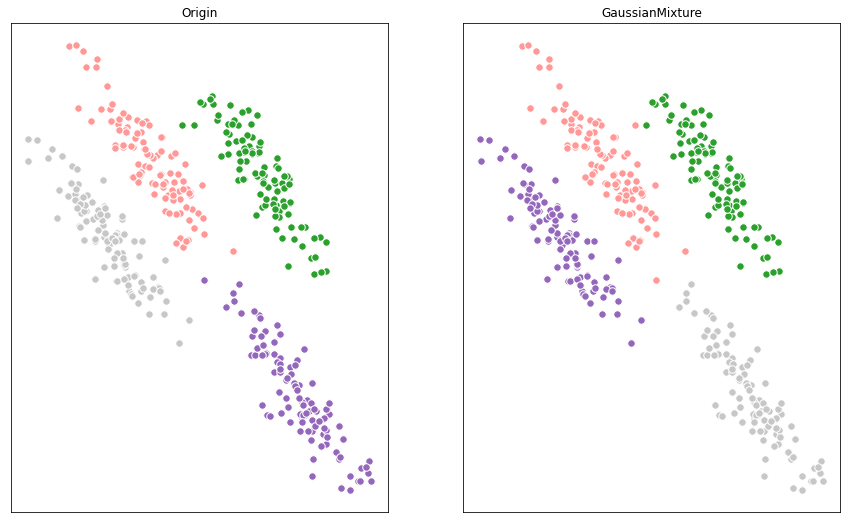

homogeneity_score=0.9797477926204753
completeness_score=0.9798006268070297
v_measure_score=0.9797742090014835


In [6]:
Solution(GaussianMixture, {"n_components": 4, "tol": 1e-4}, my_make_blobs).perform()

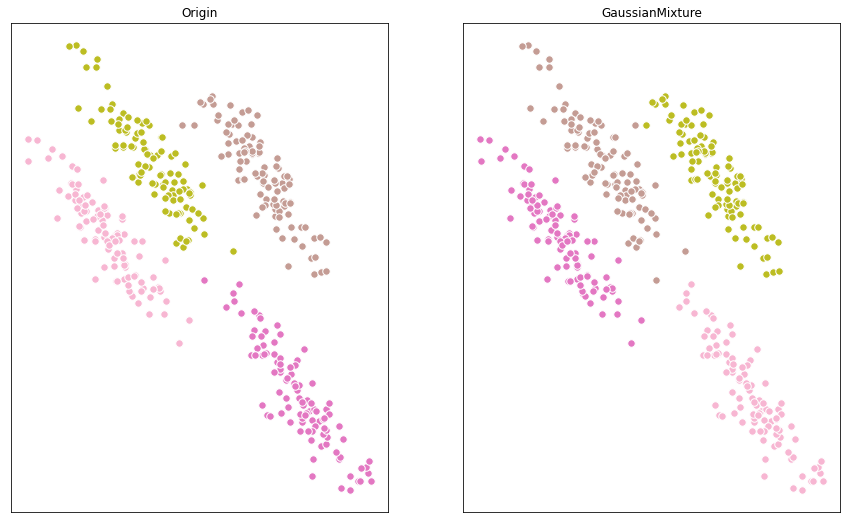

homogeneity_score=0.9797477926204754
completeness_score=0.97980062680703
v_measure_score=0.9797742090014836


In [7]:
Solution(GaussianMixture, {"n_components": 4, "tol": 1e-4}, my_make_blobs).perform(shuffle=True)

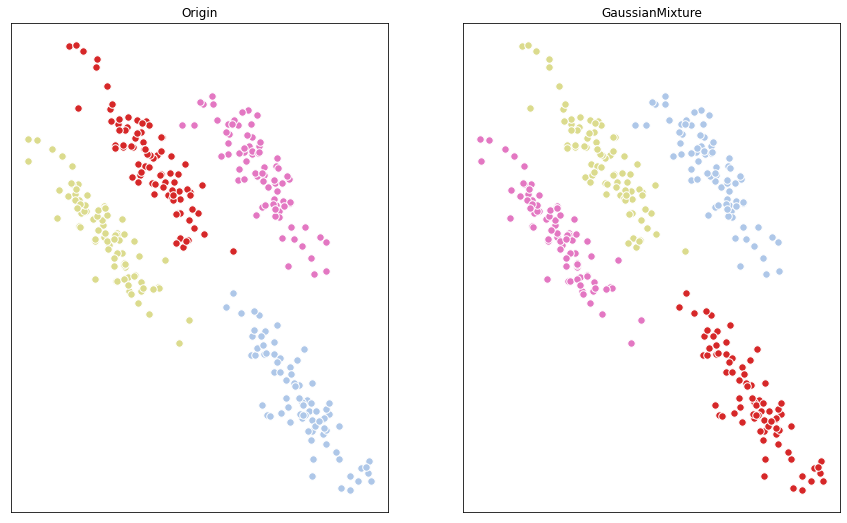

homogeneity_score=1.0
completeness_score=1.0
v_measure_score=1.0


In [8]:
Solution(GaussianMixture, {"n_components": 4, "tol": 1e-4}, my_make_blobs).perform(delete_ratio=0.2)

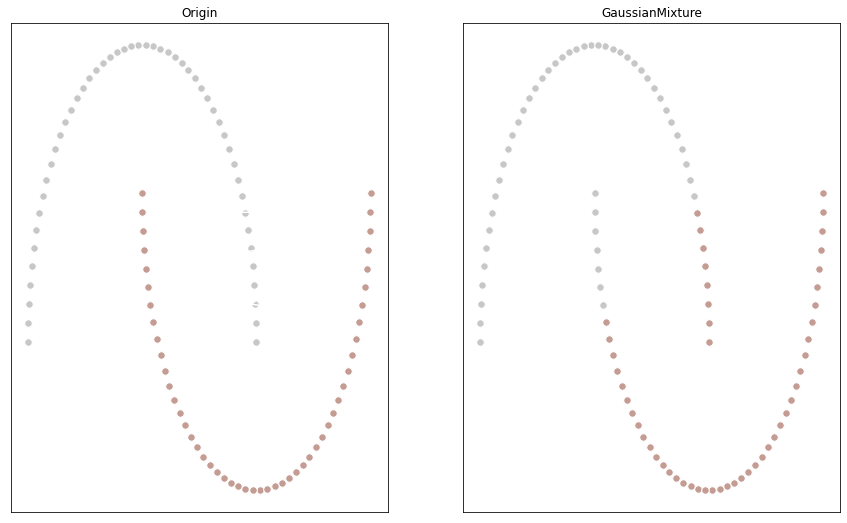

homogeneity_score=0.3904372586110995
completeness_score=0.3905499550215607
v_measure_score=0.3904935986852873


In [9]:
Solution(GaussianMixture, {"n_components": 2}, make_moons).perform()

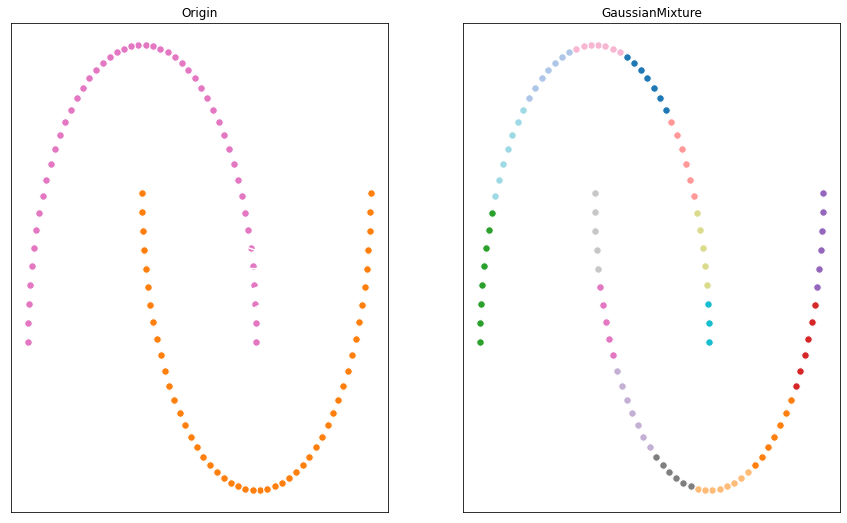

homogeneity_score=1.0000000000000007
completeness_score=0.2519819620383511
v_measure_score=0.40253289532718095


In [10]:
Solution(GaussianMixture, {"n_components": 16, "covariance_type": "full", "max_iter": 200}, make_moons).perform()

# BayesianGaussianMixture

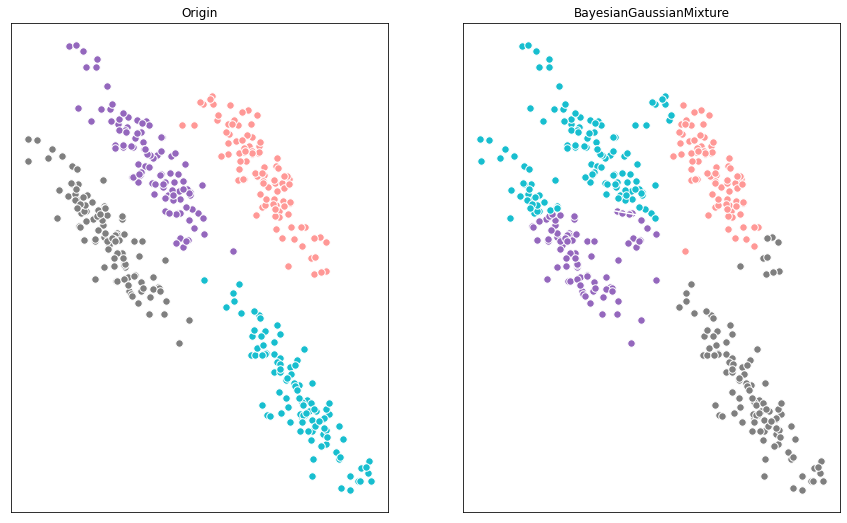

homogeneity_score=0.6773222945044578
completeness_score=0.6858924058495662
v_measure_score=0.6815804113505569


In [11]:
Solution(BayesianGaussianMixture, {"n_components": 4, "covariance_type": "diag"}, my_make_blobs).perform()

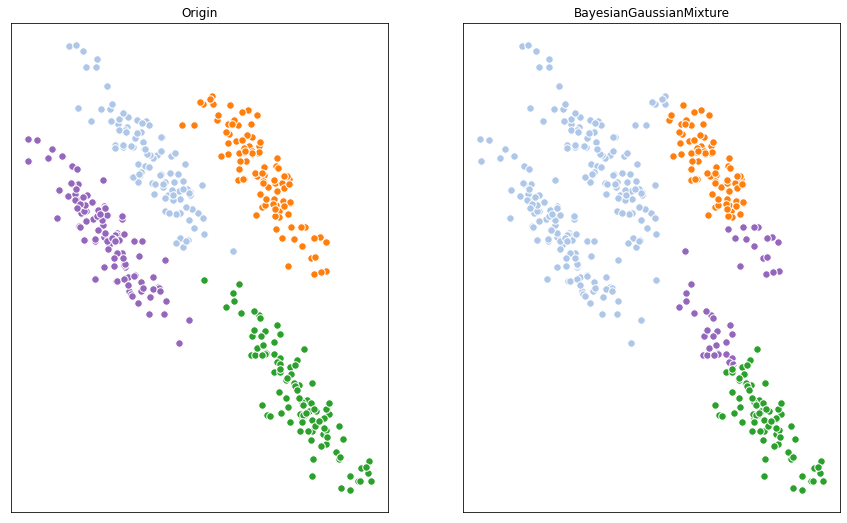

homogeneity_score=0.6249482249447121
completeness_score=0.7162745551644826
v_measure_score=0.6675021010106358


In [12]:
Solution(BayesianGaussianMixture, {"n_components": 4, "covariance_type": "diag"}, my_make_blobs).perform()

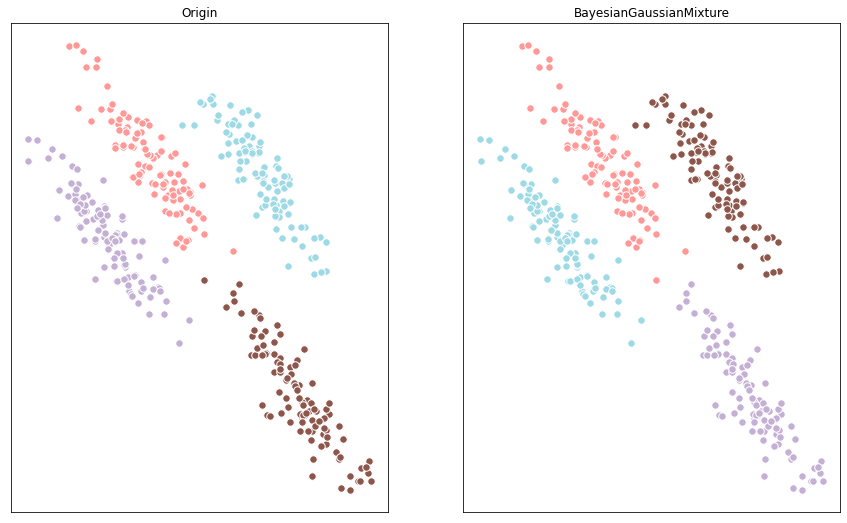

homogeneity_score=0.9898828240244267
completeness_score=0.9899006758819153
v_measure_score=0.9898917498726852


In [13]:
Solution(BayesianGaussianMixture, {"n_components": 4, "tol": 1e-5}, my_make_blobs).perform()

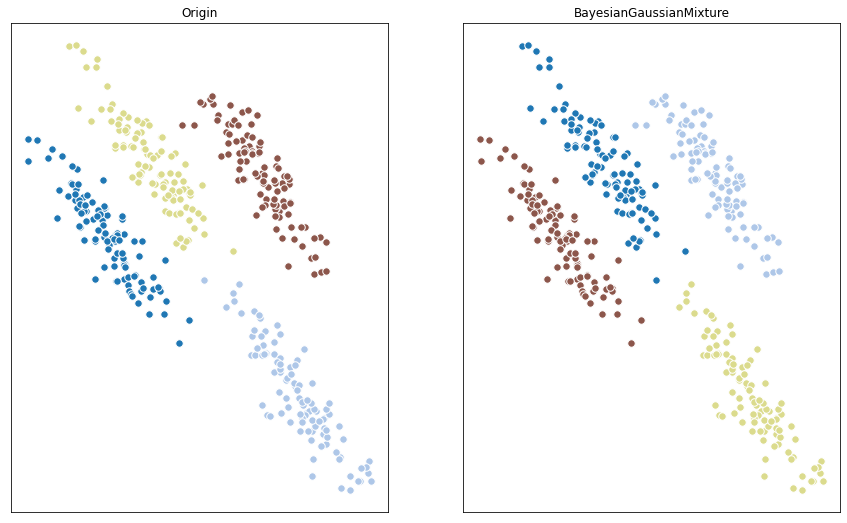

homogeneity_score=0.9898828240244267
completeness_score=0.9899006758819153
v_measure_score=0.9898917498726852


In [14]:
Solution(BayesianGaussianMixture, {"n_components": 4, "tol": 1e-5}, my_make_blobs).perform(shuffle=True)

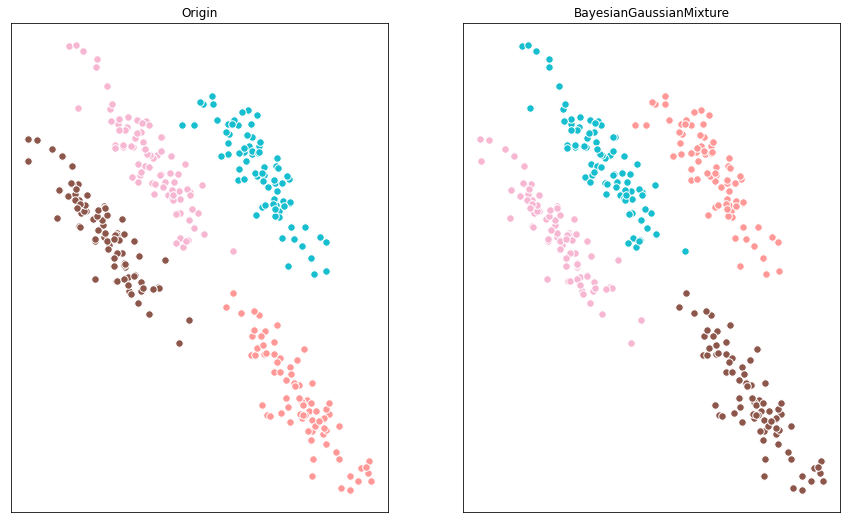

homogeneity_score=1.0
completeness_score=1.0
v_measure_score=1.0


In [15]:
Solution(BayesianGaussianMixture, {"n_components": 4, "tol": 1e-5}, my_make_blobs).perform(delete_ratio=0.2)

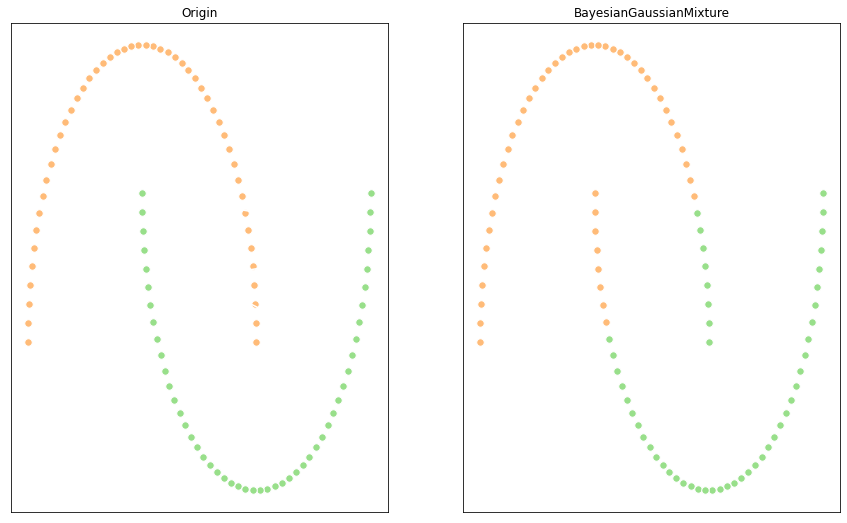

homogeneity_score=0.3656904453594348
completeness_score=0.3656904453594348
v_measure_score=0.3656904453594348


In [16]:
Solution(BayesianGaussianMixture, {"n_components": 2, "tol": 1e-5}, make_moons).perform()

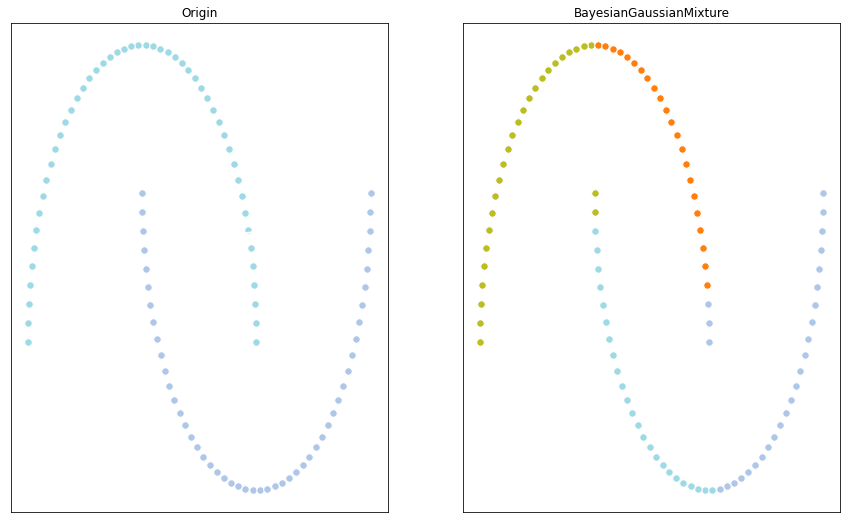

homogeneity_score=0.7612646714701203
completeness_score=0.3816339373748318
v_measure_score=0.5083993133058629


In [18]:
Solution(BayesianGaussianMixture, {"n_components": 16}, make_moons).perform()

# Висновок
В цій лабораторній роботі я перевірив методи кластеризації `GaussianMixture`, `BayesianGaussianMixture`
на двох наборах даних, які суттєво відрізняються за своєю структурою. Для кожного методу вручну було підібрано
параметри, на яких ці моделі показують найкращі метрики.

Для набору даних `make_blobs`, який було модифіковано, найкращою моделлю була модель `BayesianGaussianMixture`, проте
`GaussianMixture` дала не набагто гірше результати, оскільки вони помилилася на двох прикладах, якщо порівнювати з
початковою належністю до класу.

Для набору даних `make_moons` суміші функції Гауса не працюють, але якщо поставити 16 класетрів, то модель розпізнає
загальний обрис набору даних, тобто не відносить зразки початковго спільного класу до двох різних.

Жодне з розбиттів не виявилося стабільним на даних. Після видалення 20% даних, метрики для обох випадків стали
дорівнювати 1. Після зміни порядку об'єктів метрики змінилися десб в гіршу, а десь в кращу сторону.